<a href="https://colab.research.google.com/github/joshimohitm9/Feature-Engineering/blob/main/Column_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder ,OneHotEncoder ,LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
link="https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day28-column-transformer/covid_toy.csv"
df=pd.read_csv(link)
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [ ]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [ ]:
df["city"].unique()

array(['Kolkata', 'Delhi', 'Mumbai', 'Bangalore'], dtype=object)

<Axes: xlabel='fever', ylabel='Density'>

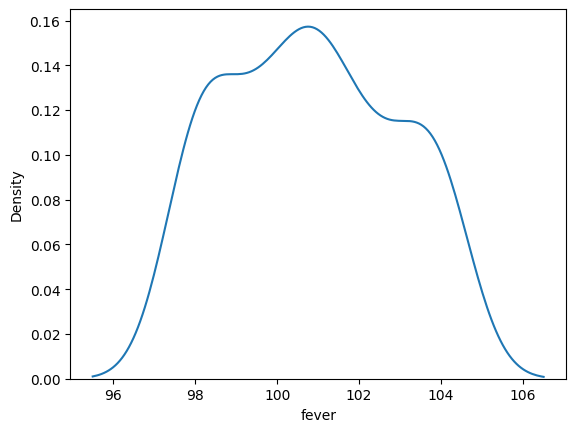

In [ ]:
import seaborn as sns
sns.kdeplot(df.fever)


In [ ]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:5]
y=df["has_covid"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [ ]:
x_train

,age,gender,fever,cough,city
57,49,Female,99.0,Strong,Bangalore
64,42,Male,104.0,Mild,Mumbai
80,14,Female,99.0,Mild,Mumbai
24,13,Female,100.0,Strong,Kolkata
70,68,Female,101.0,Strong,Delhi
...,...,...,...,...,...
8,19,Female,100.0,Strong,Bangalore
90,59,Female,99.0,Strong,Delhi
5,84,Female,NaN,Mild,Bangalore
84,69,Female,98.0,Strong,Mumbai


In [ ]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ("tnf1", SimpleImputer(), ["fever"]),
        ("tnf2", OrdinalEncoder(categories=[['Mild', 'Strong']]), ["cough"]),
        ("tnf3", OneHotEncoder(drop="first"), ["gender"]),
        ("tnf4",OneHotEncoder(),["city"])
    ],
    remainder="passthrough"
)
x_train_transformed=transformer.fit_transform(x_train)
x_train_transformed=pd.DataFrame(x_train_transformed)
x_train_transformed.columns=["fever","cough","male","Bangalore","Delhi","Kolkata","Mumbai","age"]

x_test_transformed=transformer.fit_transform(x_test)
x_test_transformed=pd.DataFrame(x_test_transformed)
x_test_transformed.columns=["fever","cough","male","Bangalore","Delhi","Kolkata","Mumbai","age"]

In [ ]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
y_train

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
x_train_transformed

,fever,cough,male,Bangalore,Delhi,Kolkata,Mumbai,age
0,99.000000,1.0,0.0,1.0,0.0,0.0,0.0,49.0
1,104.000000,0.0,1.0,0.0,0.0,0.0,1.0,42.0
2,99.000000,0.0,0.0,0.0,0.0,0.0,1.0,14.0
3,100.000000,1.0,0.0,0.0,0.0,1.0,0.0,13.0
4,101.000000,1.0,0.0,0.0,1.0,0.0,0.0,68.0
...,...,...,...,...,...,...,...,...
75,100.000000,1.0,0.0,1.0,0.0,0.0,0.0,19.0
76,99.000000,1.0,0.0,0.0,1.0,0.0,0.0,59.0
77,101.041667,0.0,0.0,1.0,0.0,0.0,0.0,84.0
78,98.000000,1.0,0.0,0.0,0.0,0.0,1.0,69.0
